# Linear Regression
- More info: [SKL](https://scikit-learn.org/stable/modules/linear_model.html)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [7]:
df = pd.read_csv("../Datasets/Week7/FuelConsumption.csv")
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [8]:
df.shape

(1067, 13)

In [9]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [10]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


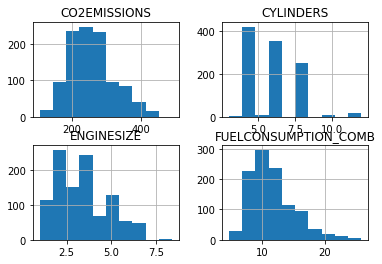

In [11]:
fig = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
fig.hist()
plt.show()

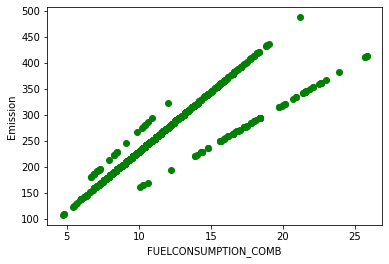

In [12]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='green')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

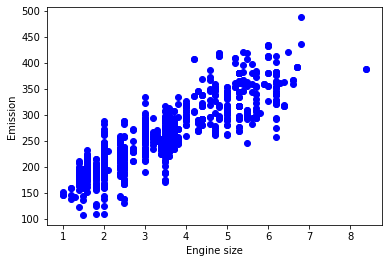

In [13]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Practice

plot __CYLINDER__ vs the Emission, to see how linear is their relation:

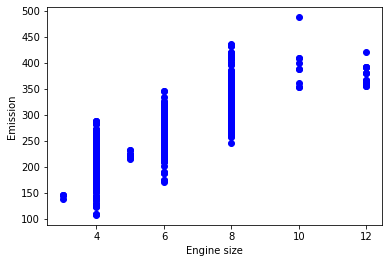

In [14]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [15]:
msk = np.random.rand(len(df)) < 0.8 # 80% of entire data for training and 20% fot testing
train = cdf[msk]
test = cdf[~msk]

<h2>Simple Regression Model</h2>

Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

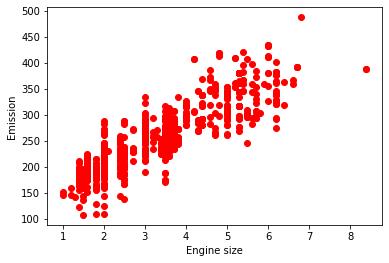

In [16]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [17]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[39.06189195]]
Intercept:  [126.29320254]


## Plot the Outputs

Text(0, 0.5, 'Emission')

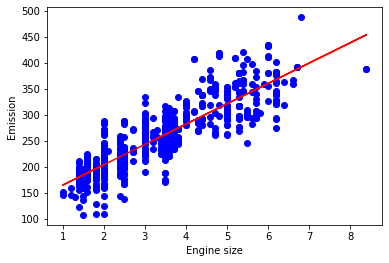

In [21]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
    <li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>

In [22]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y))
print("Model Score: %.2f" % regr.score(test_x, test_y))


Mean absolute error: 23.54
Residual sum of squares (MSE): 947.70
R2-score: 0.72
Model Score: 0.78


# Delete outliers

In [38]:
msk = np.random.rand(len(df)) < 0.8 
train = cdf[msk]
test = cdf[~msk]

In [39]:
train.shape

(837, 4)

In [40]:
train = train[train['ENGINESIZE'] < 6.5 ]
train.shape

(827, 4)

In [41]:
test.shape

(230, 4)

In [42]:
test = test[test['ENGINESIZE'] < 6.5]
test.shape

(228, 4)

In [43]:
train = train[train['CO2EMISSIONS'] < 400 ]
train.shape

(808, 4)

In [44]:
test = test[test['CO2EMISSIONS'] < 400]
test.shape

(225, 4)

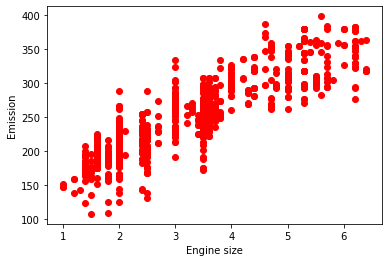

In [45]:
# ZOOM 

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [46]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[36.83611067]]
Intercept:  [130.37219172]


Text(0, 0.5, 'Emission')

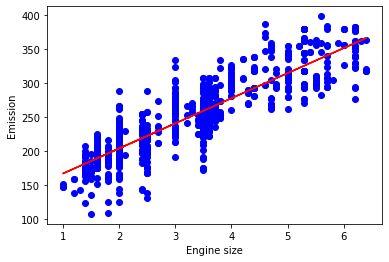

In [47]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [49]:
# Increment of loss
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y))
print("Model Score: %.2f" % regr.score(test_x, test_y))

Mean absolute error: 22.58
Residual sum of squares (MSE): 909.44
R2-score: 0.57
Model Score: 0.73


## New Dataset (Salary vs Exp)

In [50]:
# Train and test module
from sklearn.model_selection import train_test_split


In [61]:
# Load our dataset
df = pd.read_csv('../Datasets/Week7/salarios.csv')
df.head()

,exprience,Salary
0,10.0,42500
1,8.0,36302
2,5.4,35000
3,2.5,18103
4,1.0,15000


In [62]:
df.shape

(65, 2)

In [63]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [64]:
# Test_size = % of our data
# random_state = modification of our data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=0)
print(f' x train {x_train}')
print(f' y train {y_train}')
print(f' x test {x_test}')
print(f' y test {y_test}')

 x train [[ 4. ]
 [ 8. ]
 [ 1. ]
 [ 4. ]
 [ 1. ]
 [ 8. ]
 [ 3. ]
 [ 1. ]
 [ 6. ]
 [ 2. ]
 [10. ]
 [ 9. ]
 [ 8. ]
 [ 2. ]
 [ 3. ]
 [ 9. ]
 [ 3. ]
 [ 9. ]
 [ 1. ]
 [ 5. ]
 [ 8. ]
 [ 3. ]
 [ 5. ]
 [ 9. ]
 [ 2. ]
 [ 5. ]
 [10. ]
 [ 2. ]
 [ 2. ]
 [ 4. ]
 [ 8. ]
 [ 9. ]
 [ 2. ]
 [ 8. ]
 [ 3. ]
 [ 4. ]
 [ 9.2]
 [ 4. ]
 [ 2.1]
 [ 1. ]
 [ 8. ]
 [ 3.4]
 [ 2. ]
 [10. ]
 [ 2. ]
 [ 9. ]
 [ 9. ]
 [ 2.5]
 [10. ]
 [ 8. ]
 [ 4. ]
 [ 3. ]]
 y train [25000 35000 15000 27000 16200 35700 19000 16000 35201 17000 40000 39000
 36000 17300 19300 37700 19000 38500 15500 33402 37000 19000 28000 37000
 18302 28000 42500 17200 18200 25600 35200 38000 17500 36302 19201 25700
 40000 26300 17500 15900 35600 20000 17301 42000 17600 38000 37900 18103
 42500 35000 25050 19350]
 x test [[3. ]
 [1. ]
 [3. ]
 [9. ]
 [1. ]
 [1. ]
 [1. ]
 [2. ]
 [3.2]
 [9. ]
 [5.3]
 [5.4]
 [7. ]]
 y test [19250 15000 19400 38700 15800 15600 16500 17400 18300 37000 27900 35000
 35201]


In [65]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Salary')

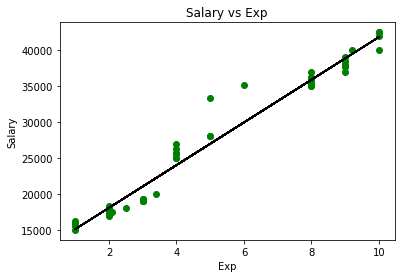

In [66]:
# Plot our train data

plotter = plt
plotter.scatter(x_train, y_train, color='green')
plotter.plot(x_train, regr.predict(x_train), color='black')
plotter.title('Salary vs Exp')
plotter.xlabel('Exp')
plotter.ylabel('Salary')

Text(0, 0.5, 'Salary')

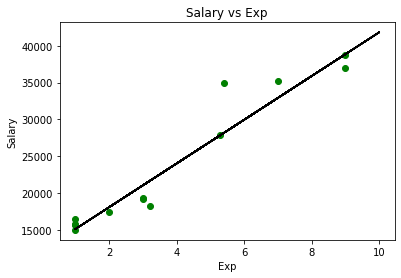

In [67]:
# plot our test data

plotter = plt
plotter.scatter(x_test, y_test, color='green')
plotter.plot(x_train, regr.predict(x_train), color='black')
plotter.title('Salary vs Exp')
plotter.xlabel('Exp')
plotter.ylabel('Salary')

In [68]:
# Accuracy of our model
regr.score(x_test, y_test)

0.9275044894307483

### Prediction

[35897.0441753]


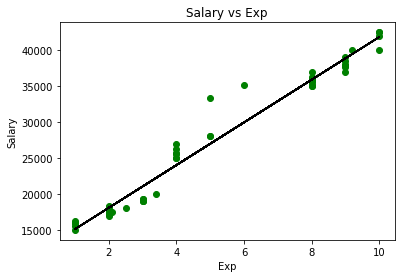

In [71]:
# If i have 8 years of exp
def prediction(x, model, x_train, y_train):
    '''
    x = years of exp
    model = Linear Regression trained
    x_train = X train Data
    y_train = Y train Data
    '''
    a = np.full(shape=(1,1), fill_value=x)
    a.reshape(1,-1)
    plt.scatter(x, model.predict(a))
    
    plt.scatter(x_train, y_train, color='green')
    plt.plot(x_train, model.predict(x_train), color='black')
    plt.title('Salary vs Exp')
    plt.xlabel('Exp')
    plt.ylabel('Salary')
    
    print(model.predict(a))


prediction(8,regr,x_train, y_train)

## With Country

In [72]:
# Adding country column
# Col = 0, Mex = 1, Chi = 2, Arg = 3
df['Country'] = np.random.randint(0, 4, df.shape[0])
df.head()

,exprience,Salary,Country
0,10.0,42500,0
1,8.0,36302,0
2,5.4,35000,3
3,2.5,18103,1
4,1.0,15000,2


In [73]:
col = df[df['Country'] == 0]
col.head()

,exprience,Salary,Country
0,10.0,42500,0
1,8.0,36302,0
13,5.0,28000,0
17,2.0,18200,0
26,3.2,18300,0


In [74]:
col.shape

(20, 3)

In [75]:
x = col.iloc[:, :-2].values
y = col.iloc[:, 1].values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=0)
regr.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
print(f' x train {x_train}')
print(f' y train {y_train}')
print(f' x test {x_test}')
print(f' y test {y_test}')

 x train [[ 8. ]
 [ 9. ]
 [ 2. ]
 [ 9. ]
 [ 3.2]
 [ 5. ]
 [ 1. ]
 [ 9. ]
 [ 4. ]
 [ 2. ]
 [ 9. ]
 [ 8. ]
 [ 2. ]
 [10. ]
 [ 9. ]
 [ 8. ]]
 y train [35000 38500 17200 37000 18300 28000 16000 38000 25700 17400 38000 35000
 18200 42500 37700 36000]
 x test [[9.]
 [8.]
 [9.]
 [2.]]
 y test [38700 36302 39000 17300]


Text(0, 0.5, 'Salary')

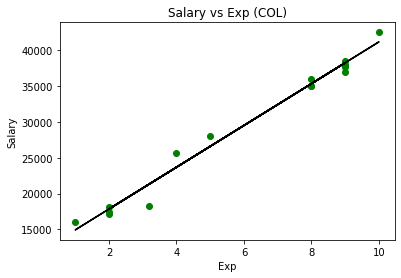

In [77]:
plotter = plt
plotter.scatter(x_train, y_train, color='green')
plotter.plot(x_train, regr.predict(x_train), color='black')
plotter.title('Salary vs Exp (COL)')
plotter.xlabel('Exp')
plotter.ylabel('Salary')

Text(0, 0.5, 'Salary')

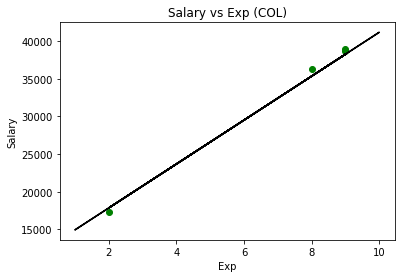

In [78]:
# plot our test data

plotter = plt
plotter.scatter(x_test, y_test, color='green')
plotter.plot(x_train, regr.predict(x_train), color='black')
plotter.title('Salary vs Exp (COL)')
plotter.xlabel('Exp')
plotter.ylabel('Salary')

In [79]:
# Accuracy of our model
regr.score(x_test, y_test)

0.9938241505247412

[32419.50957975]


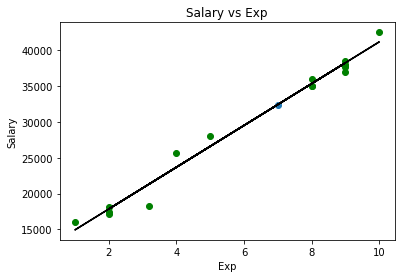

In [81]:
prediction(7,regr, x_train, y_train)

    exprience  Salary  Country
3         2.5   18103        1
7         6.0   35201        1
9        10.0   42000        1
11        7.0   35201        1
12        3.0   19201        1
(15, 3)


Text(0, 0.5, 'Salary')

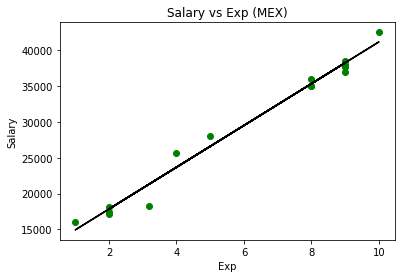

In [84]:
mex = df[df['Country'] == 1]
print(mex.head())
print(mex.shape)
x = col.iloc[:, :-2].values
y = col.iloc[:, 1].values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=0)
regr.fit(x_train, y_train)
plotter = plt
plotter.scatter(x_train, y_train, color='green')
plotter.plot(x_train, regr.predict(x_train), color='black')
plotter.title('Salary vs Exp (MEX)')
plotter.xlabel('Exp')
plotter.ylabel('Salary')

Text(0, 0.5, 'Salary')

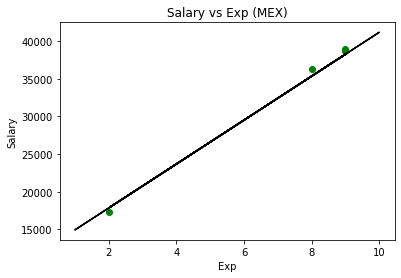

In [85]:
# plot our test data

plotter = plt
plotter.scatter(x_test, y_test, color='green')
plotter.plot(x_train, regr.predict(x_train), color='black')
plotter.title('Salary vs Exp (MEX)')
plotter.xlabel('Exp')
plotter.ylabel('Salary')

In [86]:
# Accuracy of our model
regr.score(x_test, y_test)

0.9938241505247412

[29505.58542931]


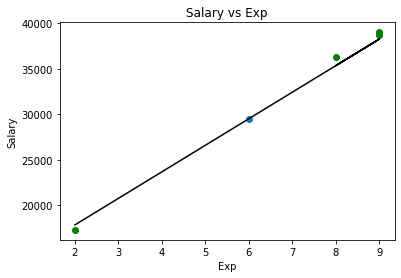

In [87]:
prediction(6,regr, x_test, y_test)

[35333.43373019]


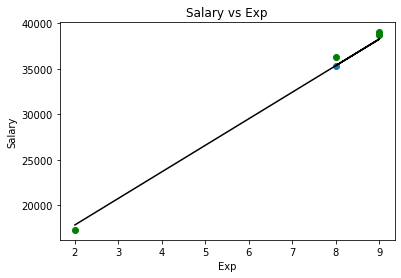

In [88]:
prediction(8,regr, x_test, y_test)

## New Dataset (Likes and Views)

In [102]:
df = pd.read_csv('../Datasets/Week7/Likes_views.csv')
df.head()

,view_count,likes,ratio
0,8036001,324742,96.91
1,9378067,562589,98.19
2,2182066,273650,99.38
3,6525864,94698,96.25
4,9481284,582481,97.22


In [94]:
df.shape

(200, 3)

In [95]:
regr = linear_model.LinearRegression()
x = df.iloc[:, 1].values
y = df.iloc[:, :-2].values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=0)
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Likes')

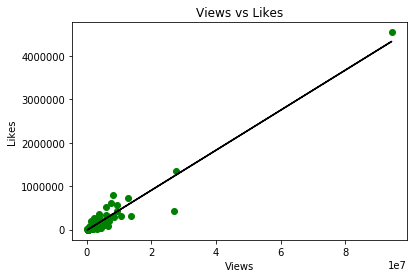

In [97]:
plotter = plt
plotter.scatter(x_train, y_train, color='green')
plotter.plot(x_train, regr.predict(x_train), color='black')
plotter.title('Views vs Likes')
plotter.xlabel('Views')
plotter.ylabel('Likes')

Text(0, 0.5, 'Likes')

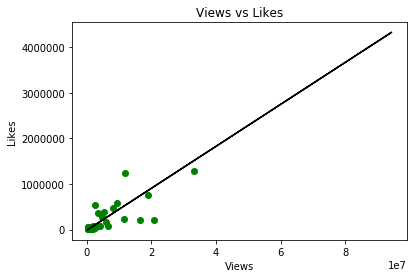

In [98]:
# plot our test data

plotter = plt
plotter.scatter(x_test, y_test, color='green')
plotter.plot(x_train, regr.predict(x_train), color='black')
plotter.title('Views vs Likes')
plotter.xlabel('Views')
plotter.ylabel('Likes')

In [101]:
regr.score(x_test,y_test)

0.5090873667626568

[14244.87583025]


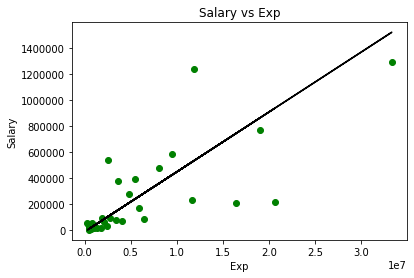

In [104]:
# 600000 Views
prediction(600000,regr, x_test, y_test)

[20686.18200603]


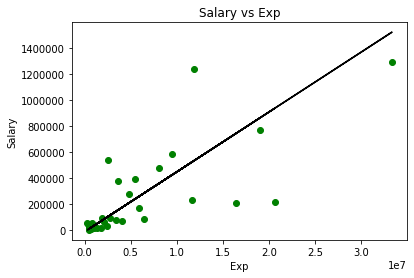

In [108]:
# i want 20000 likes (Aprox)
prediction(740000,regr, x_test, y_test)